# How well do jobs and skills pay for Data Analysts?
Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

### 1. Median Salary for top 6 data Jobs

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\loren\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# Filtering df
df_us = df[df['job_country']=='United States'].dropna(subset='salary_year_avg').copy()

# Get list of unique of top 6 job titles 
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()

# Filter a new df based on the list
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]

# Sort df by median salary
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

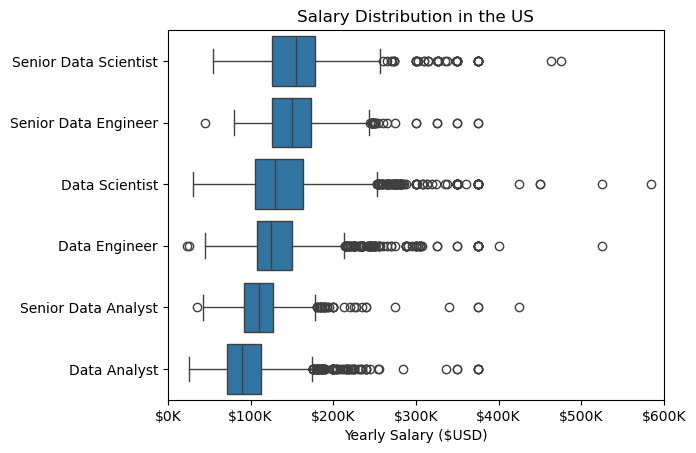

In [15]:
# Plotting
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=job_order)

plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600_000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

### 2. Median Salary per skill for Data Analyst

In [27]:
# Filter df 
df_da = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()

# Explode job skills
df_explode = df_da.explode('job_skills')

# Create df for most paid skills and most in demand 
df_da_top_pay = df_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).reset_index()
df_da_top_pay = df_da_top_pay.head(10)
df_da_top_skill = df_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).reset_index()
df_da_top_skill = df_da_top_skill.head(10).sort_values(by='median', ascending=False)


### 3. Visualize for highest paying skills and most demanded skills

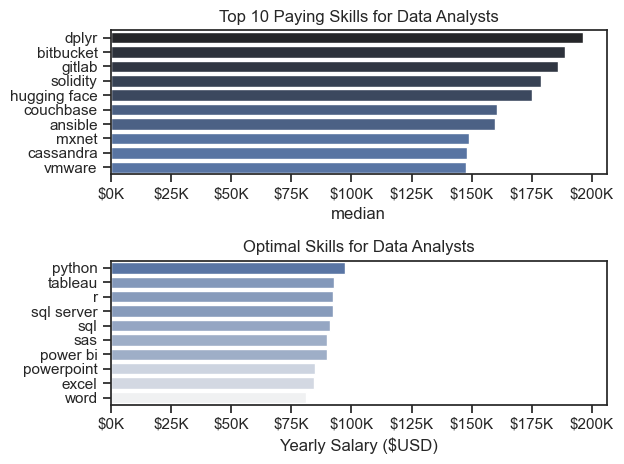

In [28]:
# Plotting

fig, ax = plt.subplots(2,1)

sns.set_theme(style="ticks")

sns.barplot(data=df_da_top_pay, x='median', y='job_skills', ax=ax[0], hue='median', palette='dark:b_r')
ax[0].set_title(f'Top 10 Paying Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].legend().remove()

sns.barplot(data=df_da_top_skill, x='median', y='job_skills', ax=ax[1], hue='median', palette='light:b')
ax[1].set_title(f'Optimal Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].legend().remove()

# format x axis
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# set equal the 2 x axes
ax[1].set_xlim(ax[0].get_xlim())

# set x label 
ax[1].set_xlabel('Yearly Salary ($USD)')

# print
plt.tight_layout()
plt.show()